# Airline Passenger Satisfaction

The aim of this notebook is to find out which factors contribute to customer satisfaction. Furthermore, the provided train and test data will be implemented to show how the machine learning models perform.

### Content
Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

In [3]:
import pandas as pd
import numpy as np


In [4]:
df_test = pd.read_csv("test.csv") 
df_train = pd.read_csv("train.csv") 
df_test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [5]:
df_train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

First of all, since the format of both train and test data is the same, I'm going to merge the data. 
The reason to do this is to clean the data together.

In [8]:
full_df = pd.concat([df_test, df_train]) # Merge the data
full_df.index.name = 'i' #renaming the index column 
full_df = full_df.reset_index() #Resetting the indexes for appearance's sake.
full_df = full_df.drop(['i', 'Unnamed: 0'], axis = 1) # Remove the columns of indexes
full_df = full_df.drop(['id'], axis = 1) #Remove id column as well

full_df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [9]:
full_df.isnull().sum() # We know there is NaN values in Arrival Delay in Minutes

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

In [10]:
full_df[full_df.isna().any(axis=1)] # Need to think how to replace NaN values.

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
516,Female,Loyal Customer,21,Personal Travel,Eco,632,1,5,1,4,...,2,4,2,5,4,5,2,9,NaN,neutral or dissatisfied
656,Male,Loyal Customer,9,Personal Travel,Eco,762,2,5,2,2,...,4,2,5,2,5,2,4,51,NaN,neutral or dissatisfied
1071,Male,disloyal Customer,25,Business travel,Eco,1017,3,4,4,5,...,5,2,5,2,3,2,5,126,NaN,neutral or dissatisfied
1224,Male,Loyal Customer,7,Personal Travel,Eco,399,4,5,4,4,...,4,4,3,1,1,4,4,0,NaN,neutral or dissatisfied
1589,Female,Loyal Customer,58,Business travel,Eco,129,5,3,3,3,...,5,5,5,5,3,5,5,3,NaN,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128043,Male,Loyal Customer,49,Personal Travel,Eco Plus,1249,2,5,2,3,...,3,4,5,4,3,4,3,230,NaN,neutral or dissatisfied
128360,Male,Loyal Customer,58,Business travel,Eco,733,3,3,3,3,...,3,3,1,2,4,2,3,55,NaN,neutral or dissatisfied
128528,Female,disloyal Customer,29,Business travel,Eco,1107,2,1,1,1,...,5,4,1,5,5,3,5,0,NaN,neutral or dissatisfied
128936,Male,Loyal Customer,58,Business travel,Eco,1088,4,4,1,1,...,5,1,5,5,5,3,5,0,NaN,satisfied


There are mainly three ways (I say) to deal with these NaN values. 
1. Delete the rows
2. Replace to the average value of 'Arrival Delay in Minutes'
3. Check the heatmap and see which attribute is very related to 'Arrival Delay in Minutes', then we can replace 'Arrival Delay in Minutes' to the value of the attribute.



In [11]:
# Check the heatmap to see the relations between attributes.
# To do that, I need to encode from string to numberical.

full_df['Gender'] = full_df['Gender'].replace({"Male": 0, "Female": 1})
full_df['satisfaction'] = full_df['satisfaction'].replace({"neutral or dissatisfied": 0, "satisfied": 1})
full_df['Type of Travel'] = full_df['Type of Travel'].replace({"Personal Travel": 0, "Business travel": 1})
full_df['Customer Type'] = full_df['Customer Type'].replace({"disloyal Customer": 0, "Loyal Customer": 1})
full_df['Class'] = full_df['Class'].replace({"Eco": 0, "Eco Plus": 1, "Business": 2})
full_df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,1,52,1,0,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,1
1,1,1,36,1,2,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,1
2,0,0,20,1,0,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,0
3,0,1,44,1,2,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,1
4,1,1,49,1,0,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,0,23,1,0,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,0
129876,0,1,49,1,2,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,1
129877,0,0,30,1,2,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,0
129878,1,0,22,1,0,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,0


<AxesSubplot:>

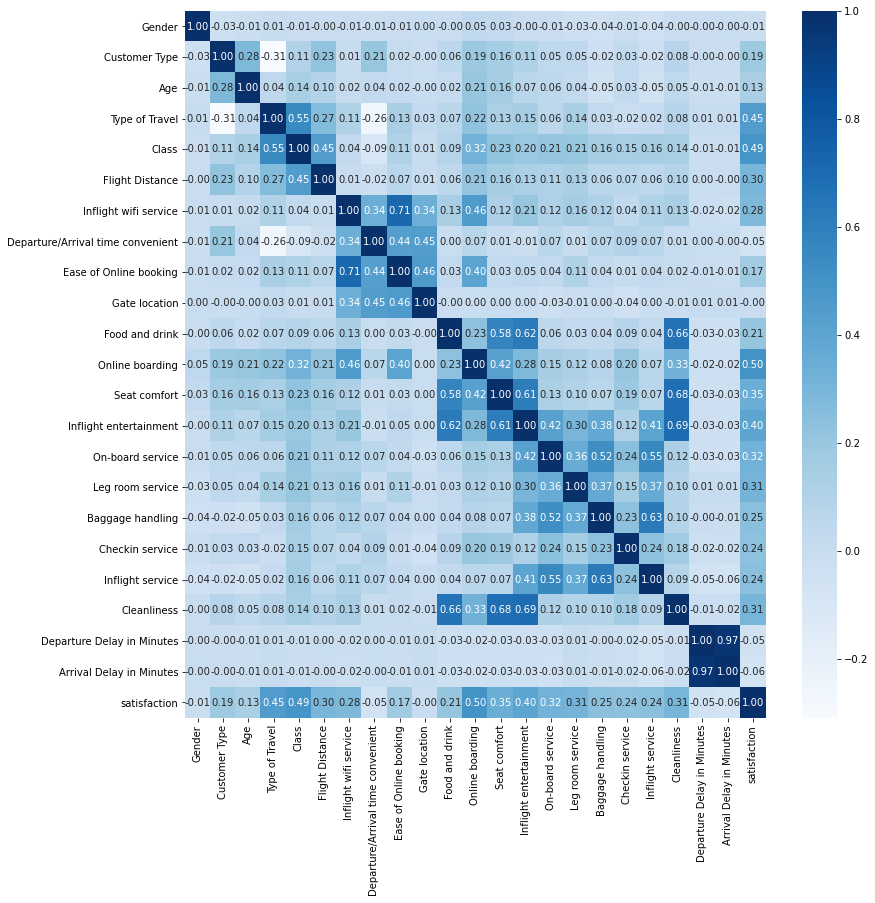

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(13,13))
sns.heatmap(full_df.corr(), cmap = 'Blues', annot=True, fmt=".2f")

As you can see the above table, there are a few strong relations such as 'Inflight wifi service' and 'Ease of Online booking', 'Cleanliness' and 'Inflight entertainment'. 
The strongest relation we can see here is between 'Arrival Delay in Minutes' and 'Departure Delay in Minutes', which is 0.97. This means that if 'Departure Delay in Minutes' gets bigger or smaller, the value of 'Arrival Delay in Minutes' goes similar. 
Therefore, putting the same value of 'Departure Delay in Minutes' into 'Arrival Delay in Minutes' can result in better performance rather than putting the average value of 'Arrival Delay in Minutes' into NaN values. We can say that the two attributes perform 97% the same.

To double check, let's draw the relation graph of 'Departure Delay in Minutes' and 'Arrival Delay in Minutes' to see the tendency.

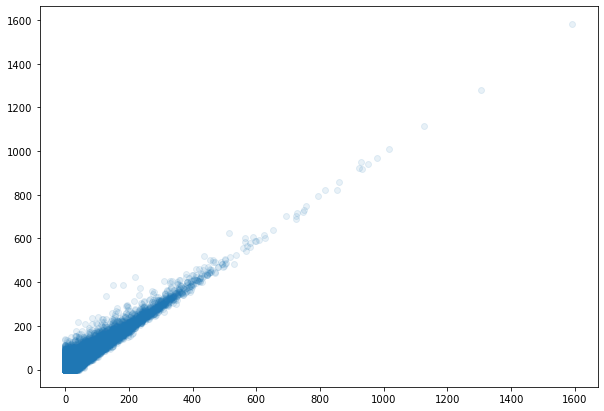

In [13]:
fig = plt.figure(figsize = (10,7))
plt.scatter(full_df['Departure Delay in Minutes'], full_df['Arrival Delay in Minutes'], alpha = 0.1)

This confirms that they are very related to each other. Therefore, I decided to put the 'Departure Delay in Minutes' values into NaN of 'Arrival Delay in Minutes'.

In [17]:
full_df['Arrival Delay in Minutes'].fillna(full_df['Departure Delay in Minutes'], inplace = True)
full_df.info() # Fill the NaN values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  int64  
 1   Customer Type                      129880 non-null  int64  
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  int64  
 4   Class                              129880 non-null  int64  
 5   Flight Distance                    129880 non-null  int64  
 6   Inflight wifi service              129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Ease of Online booking             129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Online boarding                    1298

<AxesSubplot:>

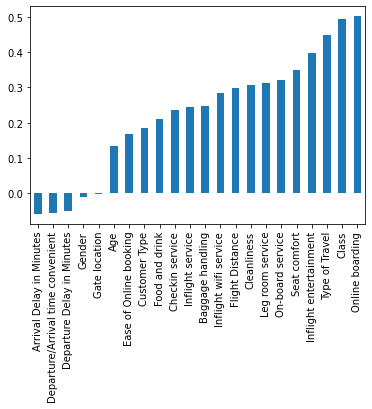

In [33]:
full_df.corr()['satisfaction'].sort_values().drop('satisfaction').plot(kind='bar')

As shown the above graph, 'Online boarding' is the most related to 'satisfaction'.

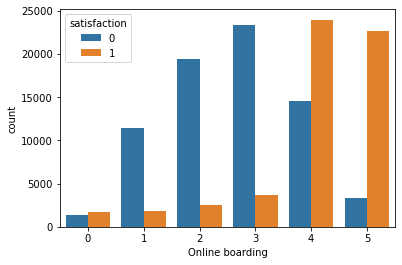

In [39]:
sns.countplot(x='Online boarding', hue = 'satisfaction', data=full_df)
plt.show()

Before we perform ML models, we just need to check if there is any outliers in any graphs.
Therefore, I will add all the graphs to check.

array([[<AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Customer Type'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Type of Travel'}>,
        <AxesSubplot:title={'center':'Class'}>],
       [<AxesSubplot:title={'center':'Flight Distance'}>,
        <AxesSubplot:title={'center':'Inflight wifi service'}>,
        <AxesSubplot:title={'center':'Departure/Arrival time convenient'}>,
        <AxesSubplot:title={'center':'Ease of Online booking'}>,
        <AxesSubplot:title={'center':'Gate location'}>],
       [<AxesSubplot:title={'center':'Food and drink'}>,
        <AxesSubplot:title={'center':'Online boarding'}>,
        <AxesSubplot:title={'center':'Seat comfort'}>,
        <AxesSubplot:title={'center':'Inflight entertainment'}>,
        <AxesSubplot:title={'center':'On-board service'}>],
       [<AxesSubplot:title={'center':'Leg room service'}>,
        <AxesSubplot:title={'center':'Baggage handling'}>,
        <A

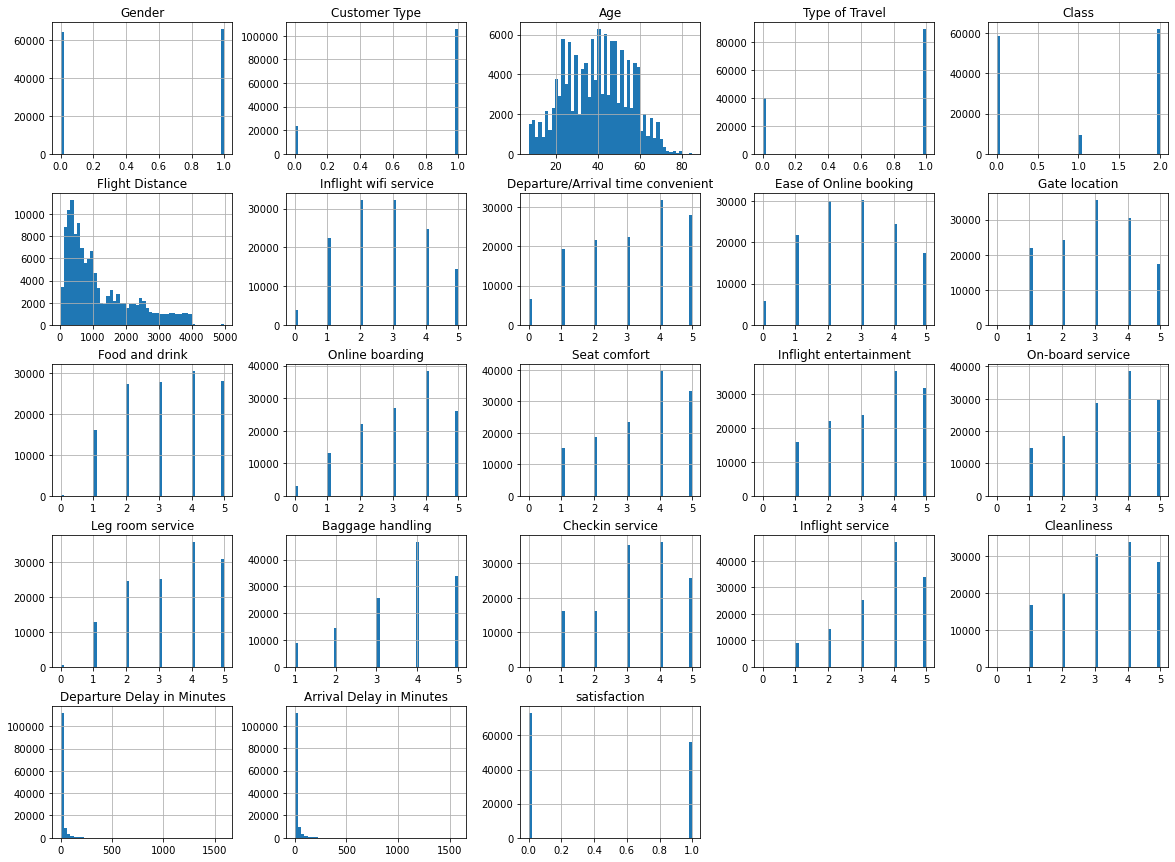

In [19]:
full_df.hist(bins=50, figsize=(20,15))

I can say there are no outliers here. In 'Departure Delay in Minutes' and 'Arrival Delay in Minutes', the max value of them is greater than 1500 mins, which is more than 24 hours, which is way too higher than other values. However, 24 hours of flight delay is possible so I will include this value.


Each attributes have different range of values (For example, in 'Flight distance', the range of it is around 0 to 5000, whereas, 'gender' is just 0 or 1. Meaning that, if we just used this value like this, 'Flight distance' would influence much more than 'gender'.

Therefore, we need to normalise the data by using 'MinMaxScaler().

In [41]:
x = full_df.drop(['satisfaction'], axis = 1)
y = full_df['satisfaction']

In [43]:
from sklearn.preprocessing import MinMaxScaler

z = x.values #returns a numpy array
min_max_scaler = MinMaxScaler()
z_scaled = min_max_scaler.fit_transform(z)
x = pd.DataFrame(z_scaled)
x

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1.0,1.0,0.576923,1.0,0.0,0.026050,1.0,0.8,0.6,0.8,...,0.6,1.0,1.0,1.0,1.00,0.4,1.0,1.0,0.031407,0.027778
1,1.0,1.0,0.371795,1.0,1.0,0.571890,0.2,0.2,0.6,0.2,...,1.0,0.8,0.8,0.8,0.75,0.6,0.8,1.0,0.000000,0.000000
2,0.0,0.0,0.166667,1.0,0.0,0.032512,0.4,0.0,0.4,0.8,...,0.4,0.4,0.8,0.2,0.50,0.4,0.4,0.4,0.000000,0.000000
3,0.0,1.0,0.474359,1.0,1.0,0.675687,0.0,0.0,0.0,0.4,...,0.8,0.2,0.2,0.2,0.00,0.6,0.2,0.8,0.000000,0.003788
4,1.0,1.0,0.538462,1.0,0.0,0.232431,0.4,0.6,0.8,0.6,...,0.4,0.4,0.4,0.4,0.25,0.8,0.4,0.8,0.000000,0.012626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1.0,0.0,0.205128,1.0,0.0,0.032512,0.4,0.2,0.4,0.6,...,0.4,0.4,0.6,0.2,0.75,0.4,0.6,0.4,0.001884,0.000000
129876,0.0,1.0,0.538462,1.0,1.0,0.467690,0.8,0.8,0.8,0.8,...,1.0,1.0,1.0,1.0,1.00,1.0,1.0,0.8,0.000000,0.000000
129877,0.0,0.0,0.294872,1.0,1.0,0.396607,0.2,0.2,0.2,0.6,...,1.0,0.8,0.6,0.4,0.75,1.0,1.0,0.8,0.004397,0.008838
129878,1.0,0.0,0.192308,1.0,0.0,0.195679,0.2,0.2,0.2,1.0,...,0.2,0.2,0.8,1.0,0.00,1.0,0.8,0.2,0.000000,0.000000


So all the values are in the range of 0 to 1. Now, we can train and test the model.

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 0)

Now, I'm going to use different ML models to see which one performs the best.
I'm going to use:
1. Logistic Regression
2. Dummy Classifier
3. Adaboost
4. Decision Tree 
5. K-Layer Cross-Validation
6. Random Forest   


## 1. Logistic Regression


In [61]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)
logistic_accuracy = logistic_model.score(X_test, y_test)
logistic_accuracy

0.8731136433631044

## 2. Dummy Classifier

In [62]:
from sklearn import metrics
from sklearn.dummy import DummyClassifier

dummy_model = DummyClassifier(strategy="most_frequent")
dummy_model.fit(X_train, y_train)
dummy_predictions = dummy_model.predict(X_test)

dummy_accuracy = metrics.accuracy_score(y_test, dummy_predictions)
dummy_accuracy

0.5637511549122267

## 3. Adaboost

In [63]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=5)
adaboost_model.fit(X_train, y_train)
adaboost_predictions = adaboost_model.predict(X_test)

adaboost_accuracy = adaboost_model.score(X_test, y_test)
adaboost_accuracy

0.9256236526024022

## 4. Decision Tree 


In [64]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
decision_tree_model.fit(X_train, y_train)

decision_tree_predictions = decision_tree_model.predict(X_test)
decision_tree_accuracy = decision_tree_model.score(X_test, y_test)
decision_tree_accuracy

0.9041422851863259

## 5. K-Layer Cross-Validation


In [66]:
from sklearn.model_selection import cross_val_score

logistic_model_for_K_layer = LogisticRegression(solver='saga', max_iter=2000)
k_fold_accuracy = np.average(cross_val_score(logistic_model_for_K_layer, x, y, cv=5))
k_fold_accuracy

0.8739451801663073

## 6. Random Forest   


In [68]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(n_estimators=10, max_depth=4, random_state=42)
random_forest_model.fit(X_train, y_train)
random_forest_predictions = random_forest_model.predict(X_test)
random_forest_accuracy = random_forest_model.score(X_test, y_test)
random_forest_accuracy

0.8987526947951956

In [71]:
print('1. Logistic regression accuracy is {}% '.format(logistic_accuracy*100))
print('2. Dummy classifier accuracy is {}% '.format(dummy_accuracy*100))
print('3. Adaboost accuracy is {}% '.format(adaboost_accuracy*100))
print('4. Decision_tree accuracy is {}% '.format(decision_tree_accuracy*100))
print('5. K-Layer Cross-Validation accuracy is {}% '.format(k_fold_accuracy*100))
print('6. Random forest accuracy is {}% '.format(random_forest_accuracy*100))

1. Logistic regression accuracy is 87.31136433631043% 
2. Dummy classifier accuracy is 56.37511549122267% 
3. Adaboost accuracy is 92.56236526024023% 
4. Decision_tree accuracy is 90.41422851863258% 
5. K-Layer Cross-Validation accuracy is 87.39451801663073% 
6. Random forest accuracy is 89.87526947951956% 


Therefore, adaboost model has the best performance of 92.6% of accuracy. 